In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

shoes = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
shoes.head(20) #View the data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981
8,9,64,914,266,2,debit,2017-03-17 20:56:50.468
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.343


In [19]:
shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [20]:
#Confirm the number of shops

shoes['shop_id'].nunique()

100

##### I can see some extreme values in order_amount
Let us perform an exploratory analysis on the data

In [21]:
shoes.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### Looking at the 'order_amount' variable, it is easy to detect outliers
The minimum and maximum order_amount are 90, and 704000, respectively

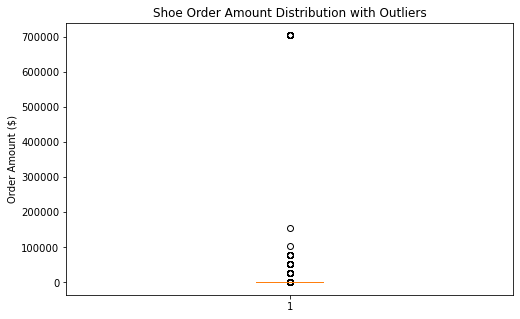

In [22]:
#Visualize the data using a boxplot. Boxplot is ideal for viewing outlier values

fig, ax = plt.subplots(figsize=(8, 5))

#Create plot
ax.boxplot(shoes['order_amount'])

ax.set(title='Shoe Order Amount Distribution with Outliers',
       ylabel= 'Order Amount ($)')

#show plot
plt.show()


#### Because of these outliers and skewed data, it may be advisable to explore the mode and median

In [23]:
shoes['order_amount'].median()

284.0

In [24]:
shoes['order_amount'].mode()

0    153
dtype: int64

### A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### Now we have seen the mean, mode and median of Average Order Amount.

It is important to know when these central tendency are being used:
- Mean: is preferred when the data distribution is continous and symmetrical (e.g normally distributed)
- Mode: is only used with nominal data
- Median: is usually prefered with skewed data

In a Normal Distibution, the Mean, Mode and Median are the same
In a Skewed Distribution, it is advised to use the Median

#### That said, as a general rule of thumb, when there is a skewed data, i should consider the median.

#### In our Sneaker shop data, the central tendency i will use will depend on how my dataset is and the insight i am looking to deliver
There are order_amount of about 704,000 which occured as a result of increase in the total items of 2000 sneakers ordered which shows a strong correlation between order_amount and total_items

In [25]:
print(shoes.corr())

              order_id   shop_id   user_id  order_amount  total_items
order_id      1.000000 -0.005967  0.002881     -0.005565    -0.006768
shop_id      -0.005967  1.000000  0.009033     -0.005559    -0.016304
user_id       0.002881  0.009033  1.000000     -0.158104    -0.161247
order_amount -0.005565 -0.005559 -0.158104      1.000000     0.991747
total_items  -0.006768 -0.016304 -0.161247      0.991747     1.000000


### B. What metric would you report for this dataset?

What is done here is the Average Order Amount and not the Average Order Value and that is inaccurate.

The calculation of AOV is $\frac{Total Revenue}{Total Number  of Orders}$
Where Total Revenue is Order Amount and Total Number of Order is the Total Items

### C. What is its value?

In [26]:
aov = shoes['order_amount'].sum() / shoes['total_items'].sum()
round(aov, 2)

357.92

### Summary 

In summary, it is important to understand what:
- Average Order
- Average Order Amount
- Average Order Value 

An Average Order Value is an important metric for data driven businesses. It represents the amount a customer paid per transaction buying a certain product through a period of time. In this context, a 30-days window